In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from seaborn import heatmap
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas as pd
# from openbb_terminal.sdk import openbb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import QuantileRegressor
import yfinance as yf

# msft = yf.Ticker("MSFT")

# msft.dividends

In [3]:
array = ['TOR.WA', 'PZU.WA', 'CPS.WA', 'PEO.WA']

df = yahoo(array).cena(start_='2012-01-01')
df_volume = yahoo(array).volume(start_='2019-01-01')
display(df)
df.describe()

# __________________________ 
avg = df.mean()
variance = df.var()
s = df.std()

print("Odchylenie standardowe")
display(avg + 1.25*s)
display(avg - 1.25*s)
display(s/avg*100)

NameError: name 'yahoo' is not defined

<Axes: xlabel='Date'>

,TOR.WA,PZU.WA,CPS.WA,PEO.WA
TOR.WA,1.000000,0.138508,-0.006819,-0.176803
PZU.WA,0.138508,1.000000,0.248925,0.440030
CPS.WA,-0.006819,0.248925,1.000000,0.000991
PEO.WA,-0.176803,0.440030,0.000991,1.000000


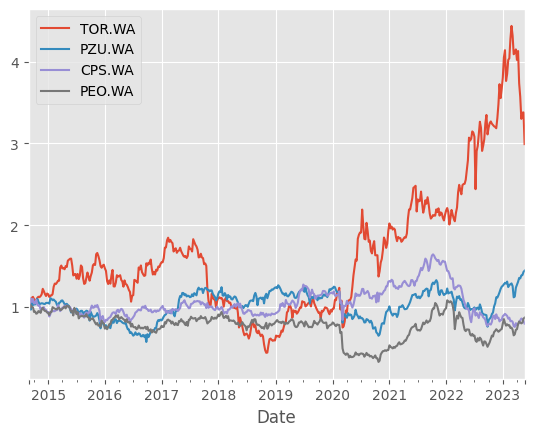

In [ ]:

df_1 = analysis(df).magnitude()


display(df_1.plot())
display(df.corr())

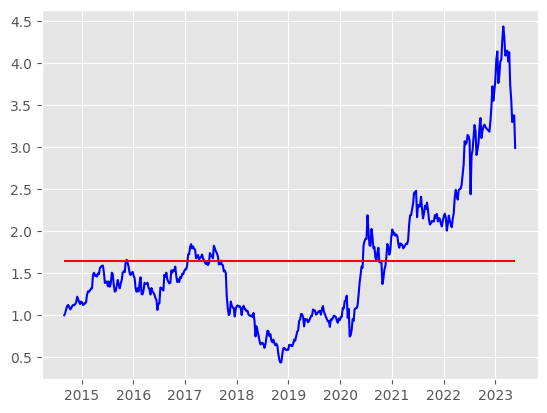

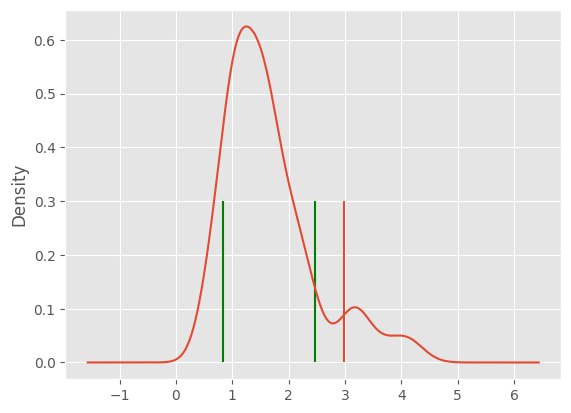

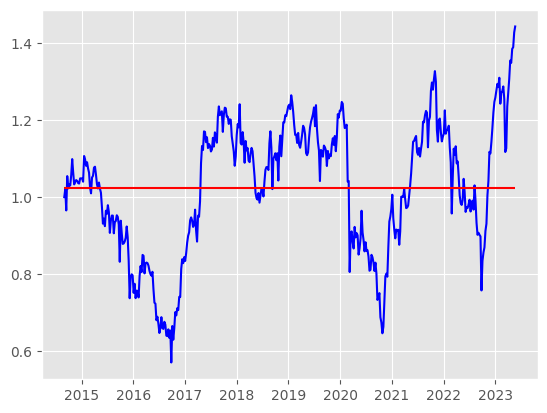

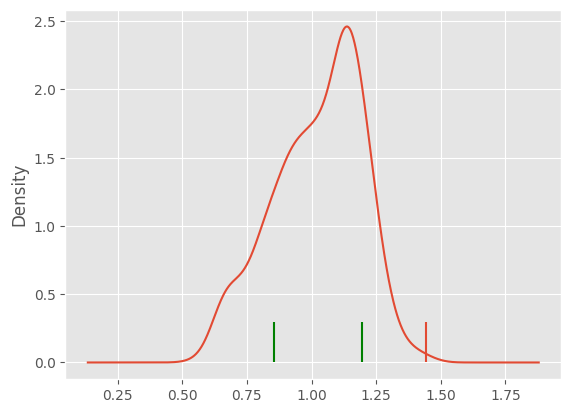

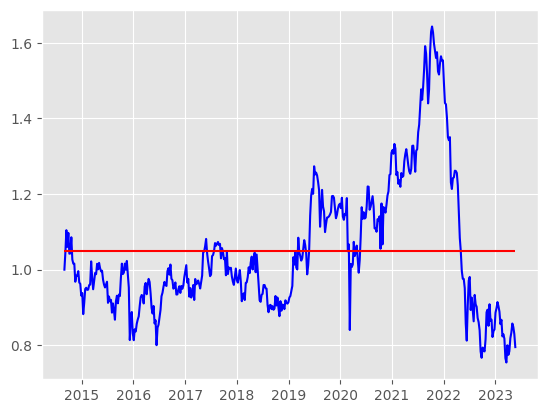

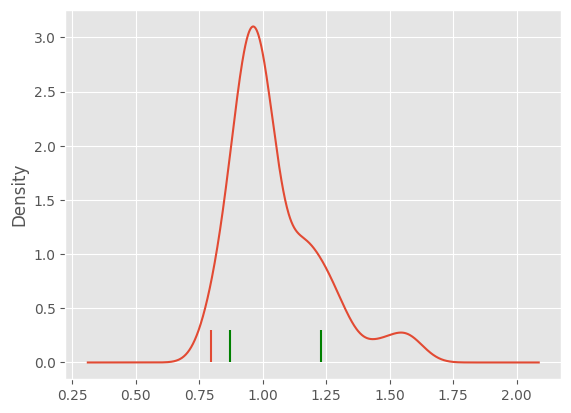

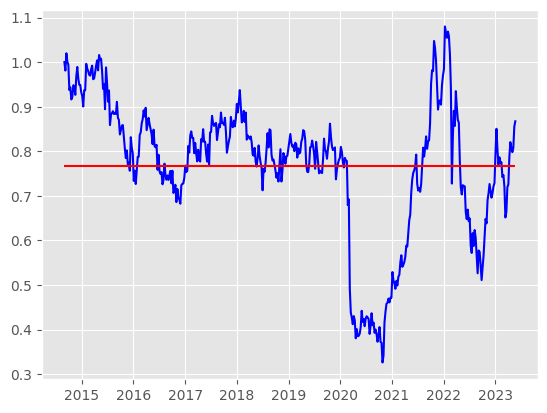

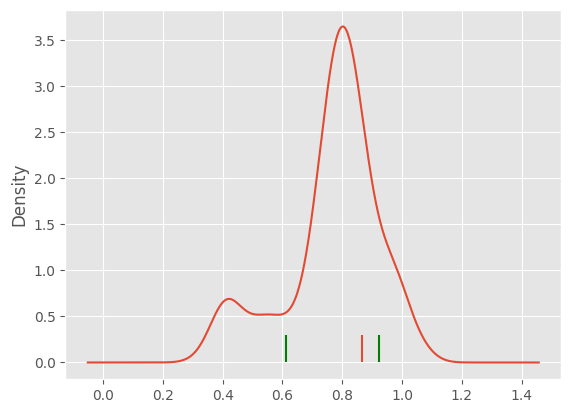

In [ ]:

analysis(df).kde()

C:\Users\dspra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\dspra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\dspra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\dspra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


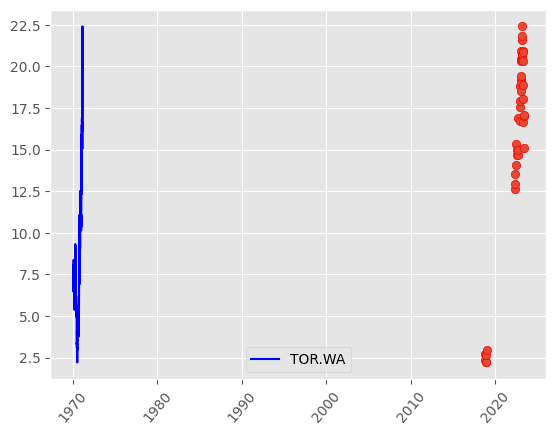

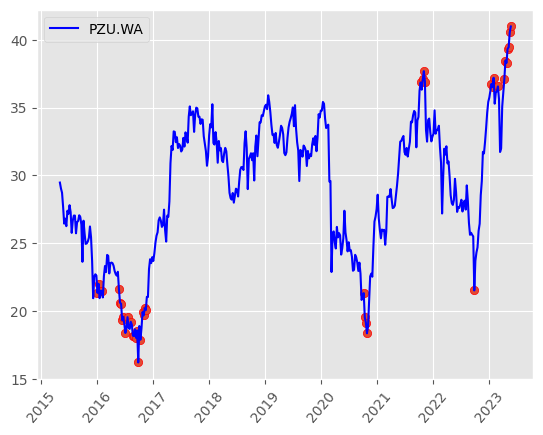

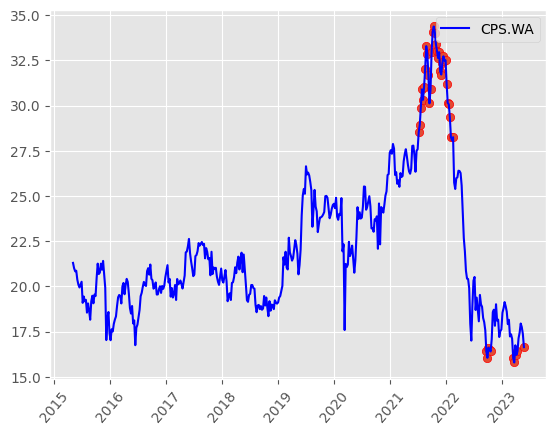

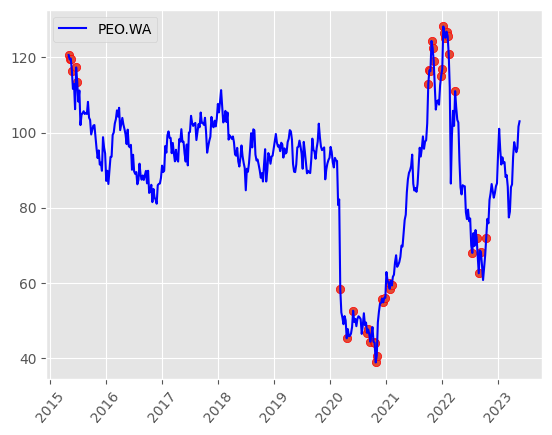

In [ ]:
df_1 = yahoo(array).cena(start_='2015-01-01' )
market = yahoo(['^GSPC']).cena(start_='2019-05-01' )

analysis(df_1).anomaly()



# --------------------- Quantile Regression

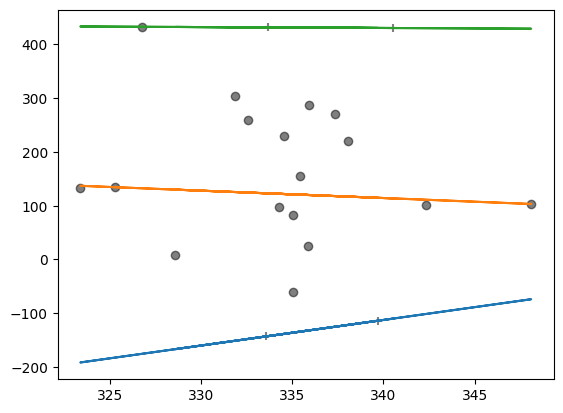

In [38]:
from sklearn.utils.fixes import parse_version, sp_version
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

msft = yf.Ticker("MSFT").history()['Close'].values

rng = np.random.RandomState(42)
x = msft
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

#display(x)

# __ ---------->>>>>>>>>>>>>>>
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

#plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")
#plt.plot(X, x)


for quantile, y_pred in predictions.items():
    #display(y_pred)
    plt.plot(X, y_pred#, label=f"Quantile: {quantile}"
             )

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

# plt.legend()
# plt.xlabel("x")
# plt.ylabel("y")
# _ = plt.title("Quantiles of heteroscedastic Normal distributed target")